In [748]:
# autoreload
%load_ext autoreload
%autoreload 2

# fix path
import sys
sys.path.append("/home/jxm/reverse-training")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [749]:
from utils.analysis import load_results_as_df
import os


HOME_DIR = "/home/jxm/reverse-training"
df = load_results_as_df(os.path.join(HOME_DIR, "results"))
print("Length:", len(df))

df = df[~df["dataset"].str.contains("newsgroup")]
df["seed_dataset_size"] = df["select_seed_dataset"].str.extract(r"(\d+)").astype(int)


Found 744 files in /home/jxm/reverse-training/results/*.pkl
Filtered 0/744 results with no evaluation metrics
dict_keys(['data', 'full_ot_distance', 'sinkhorn_distance', 'jaccard_overlap_examples', 'jaccard_overlap_vocabulary', 'levenshtein_stats', 'args', 'expert_evaluation_metrics', 'evaluation_metrics'])
Length: 744


In [750]:
df["select_seed_dataset"].value_counts()


select_seed_dataset
nq_100000     144
nq_10000      141
nq_20000       96
nq_50000       96
nq_200000      95
nq_1000000     76
nq_1000         1
Name: count, dtype: int64

In [751]:
import pandas as pd

pd.set_option('display.max_rows', None)

dv_cols = ["dataset", "select_seed_dataset", "select_full_dataset_size", "select_batch_fill_strategy"]

iv_cols = ["evaluation_best_eval_accuracy", "dataset_sinkhorn_distance", "dataset_full_ot_distance", "dataset_jaccard_overlap_vocabulary"]

df.groupby(dv_cols)[iv_cols].mean().sort_values(
    by=["dataset","select_seed_dataset", "select_full_dataset_size", "select_batch_fill_strategy"], 
    ascending=False
)

evaluation_best_eval_accuracy  \
dataset       select_seed_dataset select_full_dataset_size select_batch_fill_strategy                                  
dbpedia_10000 nq_50000            2500                     topk_balanced                                    0.550130   
                                                           topk                                             0.165853   
                                                           random                                           0.507650   
                                                           greedy_batched                                   0.655436   
                                  1000                     topk_balanced                                    0.441081   
                                                           topk                                             0.097819   
                                                           random                                           0.399902   
                                                           greedy_batched                                   0.537435   
                                  500                      topk_balanced                                    0.352376   
                                                           topk                                             0.078939   
                                                           random                                           0.317546   
                                                           greedy_batched                                   0.434082   
                                  100                      topk_balanced                                    0.150391   
                                                           topk                                             0.045410   
                                                           random                                           0.134115   
                                                           greedy_batched                                   0.183105   
              nq_200000           2500                     topk_balanced                                    0.515951   
                                                           topk                                             0.109863   
                                                           random                                           0.518229   
                                                           greedy_batched                                   0.605306   
                                  1000                     topk_balanced                                    0.420898   
                                                           topk                                             0.085124   
                                                           random                                           0.436198   
                                                           greedy_batched                                   0.480143   
                                  500                      topk_balanced                                    0.343099   
                                                           topk                                             0.071452   
                                                           random                                           0.330241   
                                                           greedy_batched                                   0.400716   
                                  100                      topk_balanced                                    0.135417   
                                                           topk                                             0.069173   
                                                           random                                           0.147135   
                                                           greedy_batched                                   0.193685   
       

In [752]:
df["select_full_dataset_size"].value_counts()

select_full_dataset_size
100     167
500     162
1000    162
2500    158
Name: count, dtype: int64

In [753]:

dv_cols = ["dataset", "select_seed_dataset", "select_full_dataset_size", "select_batch_fill_strategy"]
iv_cols = ["evaluation_best_eval_accuracy", "evaluation_best_eval_loss", "dataset_jaccard_overlap_vocabulary", "dataset_levenshtein_stats_average_distance", "dataset_full_ot_distance"]


# Final results: dataset size 1000, batch fill strategy is not bottomk
final_df = df[
    (df["select_full_dataset_size"] == 2500) & 

    (df["select_batch_fill_strategy"] != "bottomk") &
    (df["dataset"] != "newsgroup_10000")
].reset_index()
final_df = final_df.groupby(dv_cols)[iv_cols].mean().sort_values(
    by=["dataset","select_seed_dataset", "select_full_dataset_size", "select_batch_fill_strategy"], 
    ascending=False
)
final_df = final_df.reset_index()
final_df = final_df.pivot(index=["select_seed_dataset", "select_batch_fill_strategy"], columns=["dataset"], values=iv_cols)
final_df = final_df.swaplevel(0, 1, axis=1)
final_df = final_df.sort_index(axis=1)
final_df

dataset                                                   ag_news_10000  \
                                               dataset_full_ot_distance   
select_seed_dataset select_batch_fill_strategy                            
nq_10000            greedy                                     1.012828   
                    greedy_batched                             1.015290   
                    random                                     1.033143   
                    topk                                       1.030081   
                    topk_balanced                              1.031638   
nq_100000           greedy                                     0.995759   
                    greedy_batched                             1.021950   
                    random                                     1.031955   
                    topk                                       1.031631   
                    topk_balanced                              1.030165   
nq_1000000          random                                     1.032172   
                    topk                                       1.032466   
                    topk_balanced                              1.028545   
nq_20000            greedy_batched                             1.009749   
                    random                                     1.031433   
                    topk                                       1.029935   
                    topk_balanced                              1.027976   
nq_200000           greedy_batched                             1.014672   
                    random                                     1.031053   
                    topk                                       1.029576   
                    topk_balanced                              1.027293   
nq_50000            greedy_batched                             1.017020   
                    random                                     1.032013   
                    topk                                       1.033023   
                    topk_balanced                              1.025628   

dataset                                                                            \
                                               dataset_jaccard_overlap_vocabulary   
select_seed_dataset select_batch_fill_strategy                                      
nq_10000            greedy                                               0.525677   
                    greedy_batched                                       0.525256   
                    random                                               0.527920   
                    topk                                                 0.521689   
                    topk_balanced                                        0.526796   
nq_100000           greedy                                               0.508921   
                    greedy_batched                                       0.524446   
                    random                                               0.526350   
                    topk                                                 0.505785   
                    topk_balanced                                        0.524025   
nq_1000000          random                                               0.528223   
                    topk                                                 0.499894   
                    topk_balanced                                        0.513649   
nq_20000            greedy_batched                                       0.522107   
                    random                                               0.527488   
                    topk                                                 0.513092   
                    topk_balanced                                        0.524614   
nq_200000           greedy_batched                                       0.521540   
                    random                                               0.529878   
                    topk     

In [754]:
# rename all the columns
final_df.columns = [(_, col.replace("evaluation_best_eval_accuracy", "Acc")) for _, col in final_df.columns]
final_df.columns = [(_, col.replace("evaluation_best_eval_loss", "Loss")) for _, col in final_df.columns]
final_df.columns = [(_, col.replace("dataset_jaccard_overlap_vocabulary", "Jaccard Vocab")) for _, col in final_df.columns]
final_df.columns = [(_, col.replace("dataset_levenshtein_stats_average_distance", "Levenshtein")) for _, col in final_df.columns]
final_df.columns = [(_, col.replace("dataset_full_ot_distance", "OTD")) for _, col in final_df.columns]



print(final_df.to_latex(float_format=lambda x: f"{x:.3f}", escape=True))

\begin{tabular}{llrrrrrrrrrr}
\toprule
 &  & ('ag_news_10000', 'OTD') & ('ag_news_10000', 'Jaccard Vocab') & ('ag_news_10000', 'Levenshtein') & ('ag_news_10000', 'Acc') & ('ag_news_10000', 'Loss') & ('dbpedia_10000', 'OTD') & ('dbpedia_10000', 'Jaccard Vocab') & ('dbpedia_10000', 'Levenshtein') & ('dbpedia_10000', 'Acc') & ('dbpedia_10000', 'Loss') \\
select_seed_dataset & select_batch_fill_strategy &  &  &  &  &  &  &  &  &  &  \\
\midrule
\multirow[t]{5}{*}{nq\_10000} & greedy & 1.013 & 0.526 & 167.249 & 0.802 & 0.579 & 0.913 & 0.496 & 218.784 & 0.691 & 1.121 \\
 & greedy\_batched & 1.015 & 0.525 & 167.244 & 0.791 & 0.635 & 0.917 & 0.497 & 218.780 & 0.703 & 1.121 \\
 & random & 1.033 & 0.528 & 167.331 & 0.746 & 0.714 & 0.945 & 0.501 & 218.908 & 0.656 & 1.233 \\
 & topk & 1.030 & 0.522 & 167.341 & 0.668 & 1.103 & 0.974 & 0.483 & 219.730 & 0.409 & 2.840 \\
 & topk\_balanced & 1.032 & 0.527 & 167.324 & 0.749 & 0.710 & 0.927 & 0.501 & 217.971 & 0.706 & 1.007 \\
\cline{1-12}
\multirow[t]{

findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetica Neue LT Pro' not found.
findfont: Font family 'Helvetic

Saved plot to /home/jxm/reverse-training/figures/03-23-fig2-scaling-selection-size.pdf.


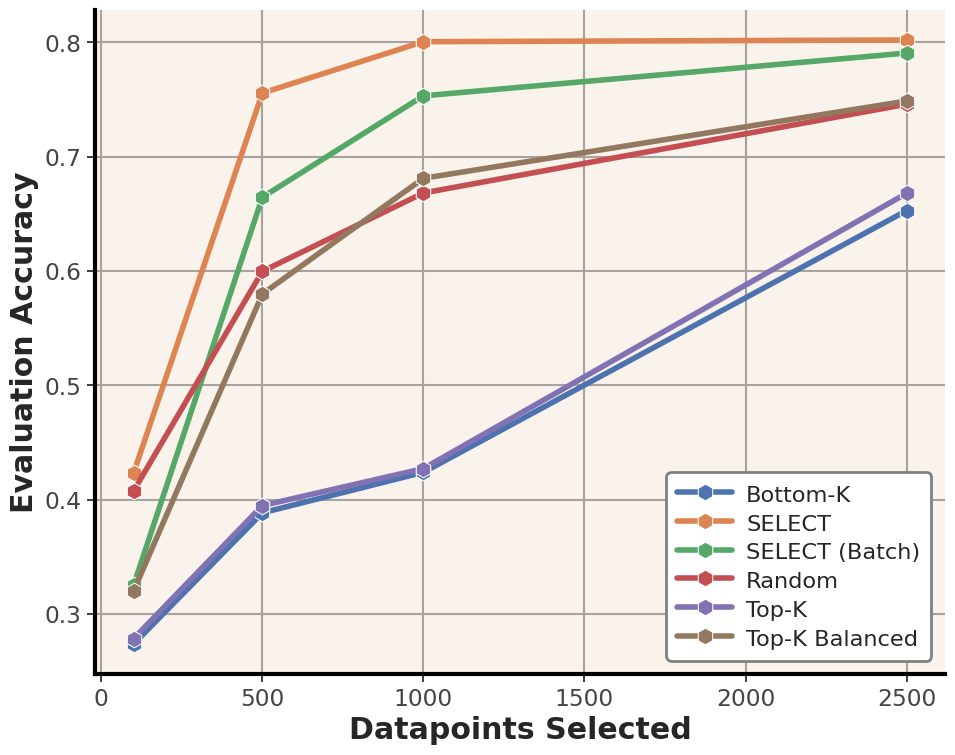

<Axes: xlabel='Datapoints Selected', ylabel='Evaluation Accuracy'>

In [768]:
# test line graph
import seaborn as sns
import matplotlib.pyplot as plt

from utils.plot_utils import plot_df

one_df = (
    df[(df["select_seed_dataset"] == "nq_10000") & (df["dataset"] == "ag_news_10000")] 
        .groupby(["select_batch_fill_strategy", "select_full_dataset_size"])["evaluation_best_eval_accuracy"] 
        .mean()
        .reset_index()
)
# ax = sns.lineplot(data=one_df, x="select_full_dataset_size", y="evaluation_best_eval_accuracy", hue="select_batch_fill_strategy", lw=2, marker="o", markersize=8)
# ax.set_xlabel("Datapoints Selected")
# ax.set_ylabel("Evaluation Accuracy")

plot_df(
    kind="line",
    df=one_df,
    x="select_full_dataset_size",
    y="evaluation_best_eval_accuracy",
    hue="select_batch_fill_strategy",
    lw=4,
    marker="o",
    markersize=12,
    xlabel="Datapoints Selected",
    ylabel="Evaluation Accuracy",
    save_path="/home/jxm/reverse-training/figures/03-23-fig2-scaling-selection-size.pdf",
    legend_loc="lower right",
    custom_legend_labels={
        "greedy": "SELECT",
        "greedy_batched": "SELECT (Batch)",
        "random": "Random",
        "topk": "Top-K",
        "topk_balanced": "Top-K Balanced",
        "bottomk": "Bottom-K",
    },
    logx=False,
    logy=False,
)

,select_batch_fill_strategy,seed_dataset_size,evaluation_best_eval_accuracy
0,bottomk,10000,0.434774
1,bottomk,100000,0.368001
2,greedy,1000,0.437988
3,greedy,10000,0.695394
4,greedy,100000,0.668783
5,greedy_batched,10000,0.633382
6,greedy_batched,20000,0.623739
7,greedy_batched,50000,0.601318
8,greedy_batched,100000,0.593709
9,greedy_batched,200000,0.595215


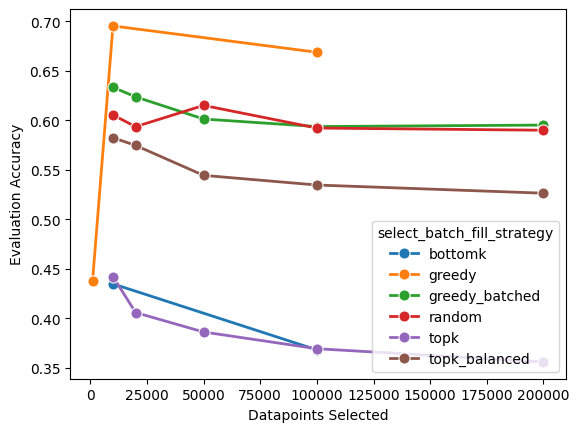

In [756]:
# test line graph
import seaborn as sns
import matplotlib.pyplot as plt

one_df = (
    df[(df["dataset"].str.startswith("ag"))] 
        .groupby(["select_batch_fill_strategy", "seed_dataset_size"])["evaluation_best_eval_accuracy"] 
        .mean()
        .reset_index()
)
one_df = one_df[one_df["seed_dataset_size"] <= 500_000]
ax = sns.lineplot(data=one_df, x="seed_dataset_size", y="evaluation_best_eval_accuracy", hue="select_batch_fill_strategy", lw=2, marker="o", markersize=8)
ax.set_xlabel("Datapoints Selected")
ax.set_ylabel("Evaluation Accuracy")
one_df

Text(0, 0.5, 'OTD')

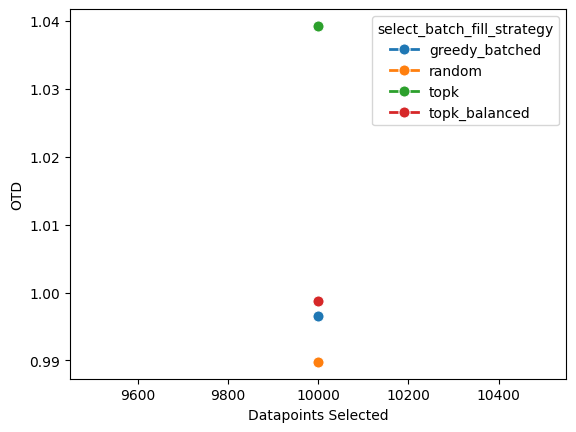

In [747]:
# test line graph
import seaborn as sns
import matplotlib.pyplot as plt

one_df = (
    df[(df["dataset"].str.startswith("ag"))] 
        .groupby(["select_batch_fill_strategy", "seed_dataset_size"])["dataset_sinkhorn_distance"] 
        .mean()
        .reset_index()
)
# one_df = one_df[one_df["seed_dataset_size"] <= 500_000]
ax = sns.lineplot(data=one_df, x="seed_dataset_size", y="dataset_sinkhorn_distance", hue="select_batch_fill_strategy", lw=2, marker="o", markersize=8)
ax.set_xlabel("Datapoints Selected")
ax.set_ylabel("OTD")


In [681]:
df["dataset_size"].value_counts()

dataset_size
100    589
Name: count, dtype: int64